In [1]:
import torch
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn

In [2]:
data = torch.load("../latent_51347814_concentration.pt")
x = data["latent"].numpy()
y = data["condition"].numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# train shallow output model on latent space

In [3]:
clf = LogisticRegression(class_weight="balanced", n_jobs=-1)
clf.fit(x_train, y_train)

print("train acc", clf.score(x_train, y_train))
print("test acc", clf.score(x_test, y_test))

train acc 0.4181726749850709
test acc 0.4155876807039598


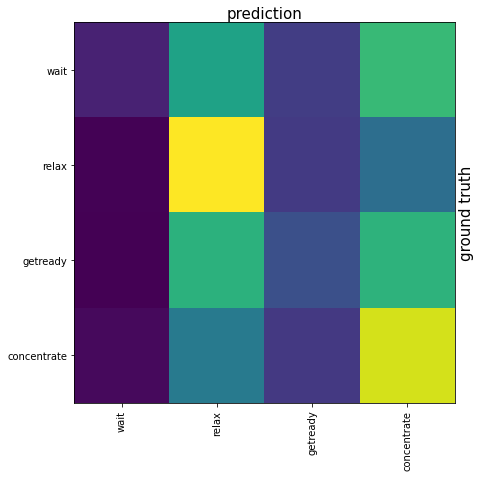

In [4]:
plt.figure(figsize=(7, 7))
plt.imshow(confusion_matrix(clf.predict(x_test), y_test, normalize="true"))
plt.xticks(range(len(np.unique(y_test))), data["condition2name"], rotation=90)
plt.yticks(range(len(np.unique(y_test))), data["condition2name"])
plt.xlabel("prediction", fontsize=15)
plt.gca().xaxis.set_label_position("top")
plt.ylabel("ground truth", fontsize=15)
plt.gca().yaxis.set_label_position("right")
plt.show()

# visualize latent space

In [5]:
max_tsne_samples = 10000

unique_y, counts = np.unique(y, return_counts=True)
max_samp = min(counts.min(), max_tsne_samples // len(unique_y))
balanced_x, balanced_y = [], []
for yval, count in zip(unique_y, counts):
    perm = np.random.permutation(count)[:max_samp]
    balanced_x.append(x[y == yval][perm])
    balanced_y.append(y[y == yval][perm])
balanced_x, balanced_y = np.concatenate(balanced_x), np.concatenate(balanced_y)

In [6]:
tsne = TSNE(n_components=2, n_jobs=-1, init="pca", learning_rate="auto")
tsne.fit(balanced_x)

/home/philipp/Python/sandbox/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


TSNE(init='pca', learning_rate='auto', n_jobs=-1)

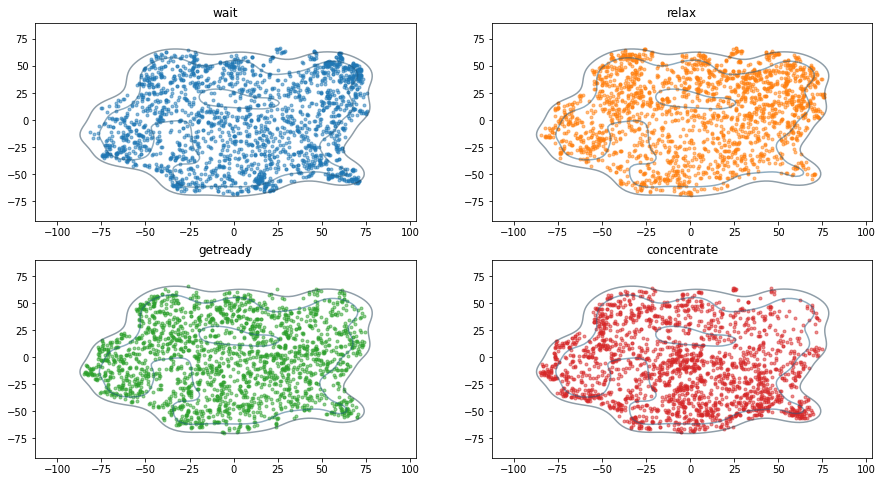

In [7]:
plt.figure(figsize=(15, len(unique_y) * 2))
for i, cls in enumerate(unique_y):
    plt.subplot(len(unique_y) // 2, 2, i + 1)
    plt.title(data["condition2name"][cls])
    plt.scatter(*tsne.embedding_[balanced_y==cls].T, marker=".", c=f"C{i}", alpha=0.5)
    seaborn.kdeplot(*tsne.embedding_.T, levels=2, alpha=0.5, ax=plt.gca())

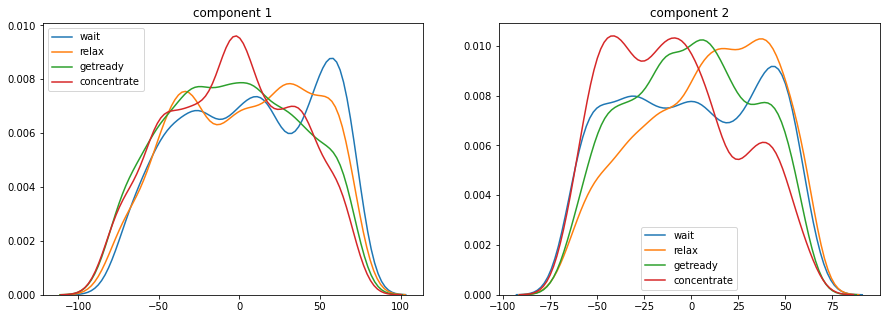

In [8]:
plt.figure(figsize=(15, 5))
for comp in range(tsne.n_components):
    plt.subplot(1, tsne.n_components, comp + 1)
    plt.title(f"component {comp + 1}")
    for i, cls in enumerate(unique_y):
        seaborn.kdeplot(tsne.embedding_[balanced_y==cls].T[comp], label=data["condition2name"][cls], ax=plt.gca())

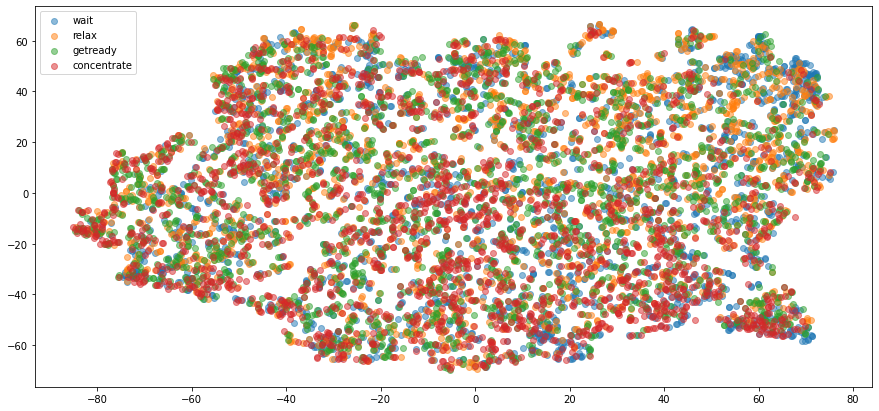

In [9]:
plt.figure(figsize=(15, 7))
for cls in unique_y:
    plt.scatter(*tsne.embedding_[balanced_y==cls].T, alpha=0.5, label=data["condition2name"][cls])
plt.legend()
plt.show()